One of the most celebrated set of differential equations in physics are the Lorenz equations: $$\frac{dx}{dt}=\sigma{}\left( y-x\right),\;\frac{dy}{dt}=r\,x-y-x\,z,\;\frac{dz}{dt}=x\,y-b\,z,$$ where $\sigma$, r and b are constants (named such for historical reasons).
The reason for their fame is that they were one of the first examples of deterministic chaos. This system's extreme sensitivity to initial conditions gives rise to the "butterfly effect" in chaos theory.

 ## Tasks:

1. Solve the Lorenz equations for the case $\sigma=10$, $r=28.5$ and $b=10/3$ in the range from $t=0$ to $t=40$, with initial conditions $(x,y,z)=(0,1,0)$. Set the number of evaluation points in time to 10000. Create a function called `butterfly(init)` which takes as argument an initial conditions array and encapsulates the full solution code returning the result of `solve_ivp()` such that it can be called in the tests (note the visible test in this exercise).

2. Plot the variable `z` against `x`, a trajectory plot. You should see a picture of the famous strange attractor of the Lorenz equations, a lop-sided butterfly shaped plot that never repeats itself. (Note the plot should not be part of the `butterfly(init)` function). On the same plot, plot the case where the initial conditions are $(x,y,z)=(0,1.1,0)$ in a different colour, ie. a 10% change in the initial value of $y$ to see the effect of a change in initial conditions.

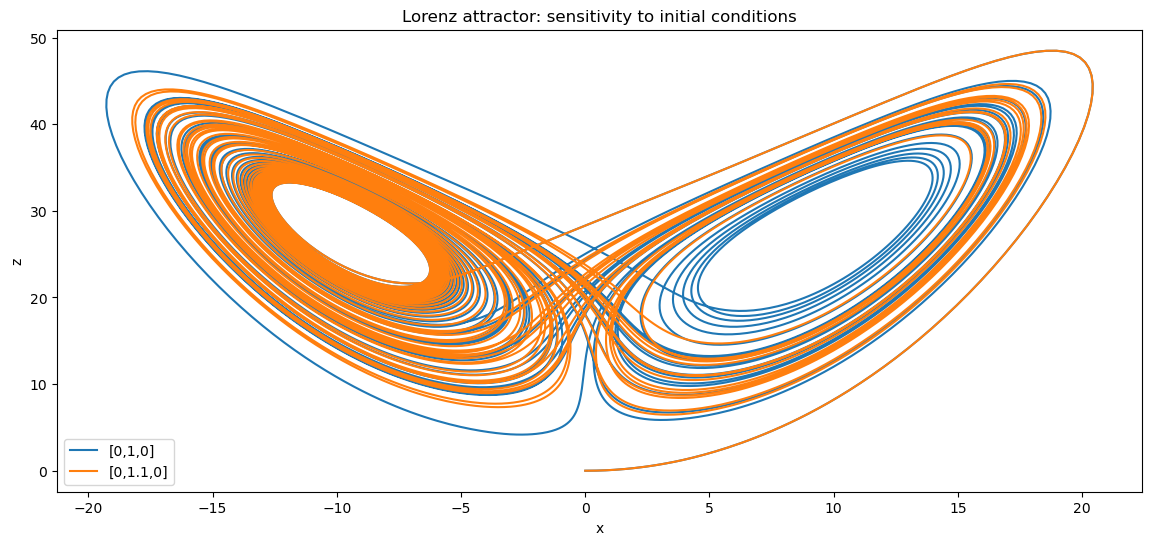

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

sigma = 10
r = 28.5
b = 10/3

time = np.linspace(0.0, 40.0, 10000)

def lorenz(t, y):
    x, y_, z = y
    dx = sigma * (y_ - x)
    dy = r * x - y_ - x * z
    dz = x * y_ - b * z
    return [dx, dy, dz]

def butterfly(init):
    return solve_ivp(
        lorenz,
        (0.0, 40.0),
        init,
        t_eval=time
    )

ans1 = butterfly(np.array([0, 1, 0]))
ans2 = butterfly(np.array([0, 1.1, 0]))

plt.figure(figsize=(14, 6))
plt.plot(ans1.y[0], ans1.y[2], label='[0,1,0]')
plt.plot(ans2.y[0], ans2.y[2], label='[0,1.1,0]')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Lorenz attractor: sensitivity to initial conditions')
plt.legend()
plt.show()
